In [2]:
# from google.colab import drive
# drive.mount('/content/drive')


In [1]:
# !pip install rasterio matplotlib


### Elevation Map Visualization

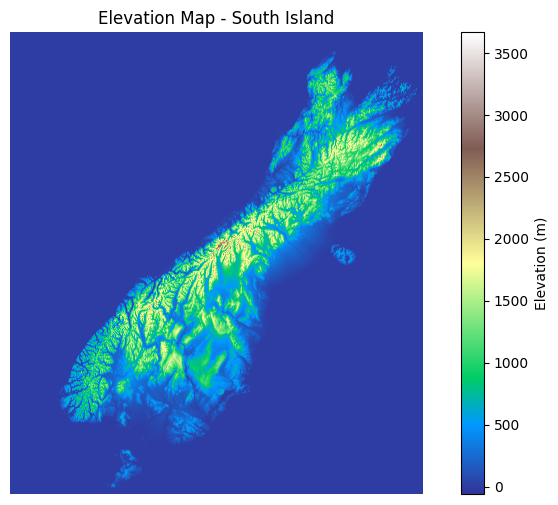

In [ ]:
# Generated SouthIsland_Elevation_EPSG2193.tif using GEE and plotting and creating png 

import rasterio
import matplotlib.pyplot as plt


# Define paths to your TIFF files in the GEE_exports folder
elevation_file = 'SouthIsland_Elevation_EPSG2193.tif'

# Open the elevation file using rasterio
with rasterio.open(elevation_file) as src:
    elevation_data = src.read(1)  # Read the first band (elevation)


# Plot and save the elevation map as an image
plt.figure(figsize=(10, 6))
plt.imshow(elevation_data, cmap='terrain')
plt.colorbar(label='Elevation (m)')
plt.title('Elevation Map - South Island')
plt.axis('off')  # Hide axis
# plt.savefig('/content/drive/My Drive/GEE_exports/NZ_South_Elevation_EPSG2193.png', bbox_inches='tight')  # Save as PNG
plt.show()



### Slope Map

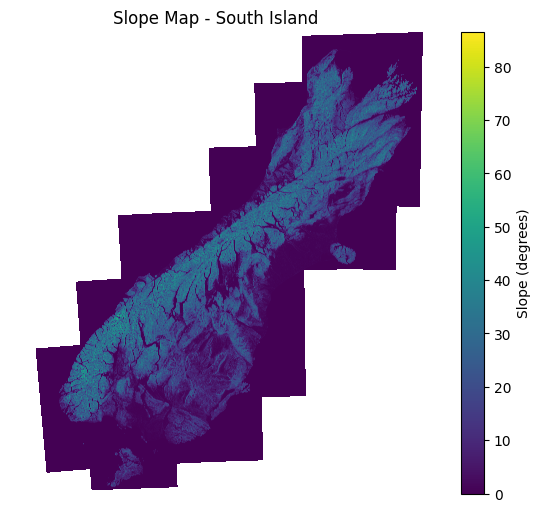

In [1]:
# Generated SouthIsland_Slope_EPSG2193.tif using GEE and plotting and creating png 

import rasterio
import matplotlib.pyplot as plt


# Define paths to your TIFF files in the GEE_exports folder
slope_file = 'SouthIsland_Slope_EPSG2193.tif'


# Open the slope file using rasterio
with rasterio.open(slope_file) as src:
    slope_data = src.read(1)  # Read the first band (slope)

# Plot and save the slope map as an image
plt.figure(figsize=(10, 6))
plt.imshow(slope_data, cmap='viridis')
plt.colorbar(label='Slope (degrees)')
plt.title('Slope Map - South Island')
plt.axis('off')  # Hide axis
# plt.savefig('/content/drive/My Drive/GEE_exports/NZ_South_Slope_EPSG2193.png', bbox_inches='tight')  # Save as PNG
plt.show()



### Forest Cover Map

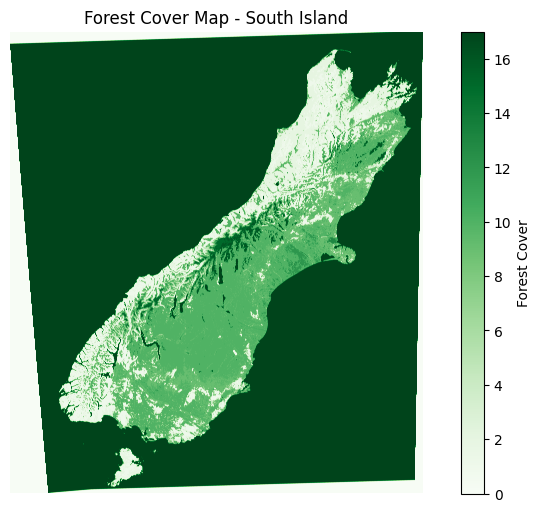

In [2]:
# Generated SouthIsland_ForestCover_EPSG2193.tif using GEE and plotting and creating png
# This is without masking and it shows forest areas incorrectly 

import rasterio
import matplotlib.pyplot as plt

# Define the path to your forest cover TIFF file in the GEE_exports folder
forest_file = 'SouthIsland_ForestCover_EPSG2193.tif'

# Open the forest cover file using rasterio
with rasterio.open(forest_file) as src:
    forest_data = src.read(1)  # Read the first band (forest cover)

# Plot and save the forest cover map as an image
plt.figure(figsize=(10, 6))
plt.imshow(forest_data, cmap='Greens')  # Use the 'Greens' colormap for forest data
plt.colorbar(label='Forest Cover')
plt.title('Forest Cover Map - South Island')
plt.axis('off')  # Hide axis
#plt.savefig('/content/drive/My Drive/GEE_exports/Forest_Cover_Map.png', bbox_inches='tight')  # Save as PNG
plt.show()


### Clipping original data with land area and save it as .tif files

In [3]:
import rioxarray
import geopandas as gpd
 
# Load the raster using rioxarray
raster_elevation = rioxarray.open_rasterio('SouthIsland_Elevation_EPSG2193.tif')
raster_forest = rioxarray.open_rasterio('SouthIsland_ForestCover_EPSG2193.tif')
raster_slope = rioxarray.open_rasterio('SouthIsland_Slope_EPSG2193.tif')
 
# Load the land area shapefile
land = gpd.read_file('./lds-nz-coastlines-and-islands-polygons-topo-150k-SHP/nz-coastlines-and-islands-polygons-topo-150k.shp')
 
# Mask the sea areas
masked_raster_elevation = raster_elevation.rio.clip(land.geometry, land.crs)
masked_raster_forest = raster_forest.rio.clip(land.geometry, land.crs)
masked_raster_slope = raster_slope.rio.clip(land.geometry, land.crs)
 
# Save the masked raster to file
masked_raster_elevation.rio.to_raster('elevation_clipped.tif')
masked_raster_forest.rio.to_raster('forest_clipped.tif')
masked_raster_slope.rio.to_raster('slope_clipped.tif')

C:\Users\ojo35\AppData\Roaming\Python\Python311\site-packages\xarray\core\duck_array_ops.py:215: RuntimeWarning: invalid value encountered in cast
  return data.astype(dtype, **kwargs)
C:\Users\ojo35\AppData\Roaming\Python\Python311\site-packages\xarray\core\duck_array_ops.py:215: RuntimeWarning: invalid value encountered in cast
  return data.astype(dtype, **kwargs)
